In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
df = pd.read_csv("Netflix Engagement (plus).csv")

In [52]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']","persian empire,empire,5th century b.c.,achaeme...",NaN
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']","producer,three word title,headstrong,arranged ...",The film follows headstrong Ginny who meets Su...
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],NaN,NaN
3,Wednesday: Season 1,Yes,2022-11-23,507700000,NaN,NaN,['Talk-Show'],youtube video,MsMojo counts down the top 10 Wednesday (2022)...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,50077.0,7.4,"['Drama', 'History', 'Romance']","prequel,queen,historical,england,queen charlot...","Betrothed against her will to King George, you..."


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18332 entries, 0 to 18331
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                18332 non-null  object 
 1   Available Globally?  18332 non-null  object 
 2   Release Date         4879 non-null   object 
 3   Hours Viewed         18332 non-null  int64  
 4   Number of Ratings    14222 non-null  float64
 5   Rating               14222 non-null  float64
 6   Genre                15761 non-null  object 
 7   Key Words            12801 non-null  object 
 8   Description          10619 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.3+ MB


In [54]:
df.columns

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Number of Ratings', 'Rating', 'Genre', 'Key Words', 'Description'],
      dtype='object')

Cleaning Data

In [55]:
df.isnull().sum()

Title                      0
Available Globally?        0
Release Date           13453
Hours Viewed               0
Number of Ratings       4110
Rating                  4110
Genre                   2571
Key Words               5531
Description             7713
dtype: int64

In [56]:
round(((df.isnull().sum()) / df.shape[0])*100, 2)
# percentage of missing values

Title                   0.00
Available Globally?     0.00
Release Date           73.39
Hours Viewed            0.00
Number of Ratings      22.42
Rating                 22.42
Genre                  14.02
Key Words              30.17
Description            42.07
dtype: float64

In [57]:
# duplicate movies?
print(df['Title'].duplicated().sum())

118


Data holds are large amount of missing data with more larger cases being columns: release date, key words, and description

Release Date seems to correlate to Neflix Original Shows considering other shows are created by Netflix or imported. 

Key Words act like tags to a show that may have been missed when the data was being scraped and may not hold much use considering its varied types of terms that are not often repeated for other shows in tags.

Description is the same case similar to Key Words, mainly holding only a quick intro to a film. The data may prove difficult to use for analysis regardless due to how unique each entry may be thus having a lack of consistency to be used for analysis.

Understanding what Shows were the most popular

In [68]:
df.loc[df['Number of Ratings'] > 100].sort_values('Rating',ascending=False).head(10)
# based on highest rated shows

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
4907,Big Time Rush: Season 1,No,NaN,2900000,10.0,10.0,"['Short', 'Comedy']",NaN,NaN
6906,Big Time Rush: Season 4,No,NaN,1400000,10.0,10.0,"['Short', 'Comedy']",NaN,NaN
4161,Big Time Rush: Season 2,No,NaN,3900000,10.0,10.0,"['Short', 'Comedy']",NaN,NaN
10524,Tom Papa: You're Doing Great!,Yes,2020-02-04,500000,5.0,10.0,"['Short', 'Comedy']",NaN,"On the impending death of her parents, a hopef..."
11793,Haroun,Yes,2021-10-27,300000,7.0,10.0,"['Short', 'History']",commercial microsoft excel course,Join Chris Haroun in this Super Bowl-inspired ...
14472,Zip & Zap and the Marble Gang // Zipi y Zape y...,No,NaN,200000,27.0,9.9,"['Short', 'Horror']",NaN,"On her 16th birthday, singer-songwriter Melody..."
12339,The Country Cowboy // Il ragazzo di campagna,No,NaN,300000,8.0,9.9,"['Documentary', 'Short']",NaN,This is a documentary about Pete Boddis a 78 y...
629,Love Is Blind: Brazil: Season 3 // Casamento à...,Yes,2023-06-07,30100000,9.0,9.9,"['Short', 'Romance']",NaN,The Blind 3 is following with two parts of the...
13862,Safe House: Season 2,No,NaN,200000,5.0,9.8,"['Action', 'Drama']",NaN,NaN
11676,Donnybrook,No,NaN,300000,15.0,9.7,"['Short', 'Comedy']",NaN,A man loses a mob bosses dog.


Note:

Ratings must be accounted for the total number rather than Ratings by itself.

Some Shows are not globally available and should be accounted for when looking into other trends.

Seems that most words and descriptions were either missing, not available, or was not recorded entirely.

Unavailable Release Dates make no sense unless its mainly looking for the release date of a Netflix Original Series. Most likely scenario is that any "Classed" Netflix Original Series has its release date recorded but imported shows such as Shawshank would not.

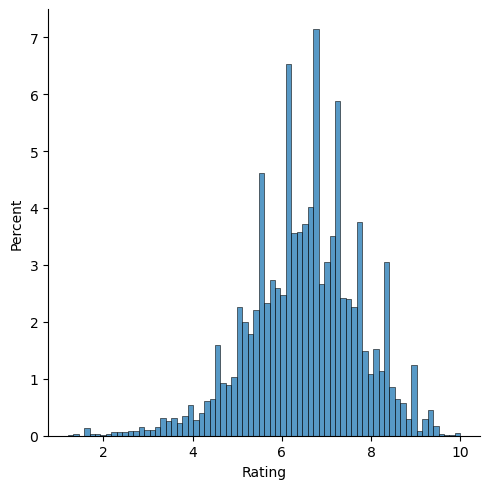

In [59]:
sns.displot(df, x='Rating', stat='percent')
# percentage of ratings 

In [60]:
df.loc[df['Available Globally?'] == 'Yes'].sort_values('Rating',ascending=False).head(10)


,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
11793,Haroun,Yes,2021-10-27,300000,7.0,10.0,"['Short', 'History']",commercial microsoft excel course,Join Chris Haroun in this Super Bowl-inspired ...
10524,Tom Papa: You're Doing Great!,Yes,2020-02-04,500000,5.0,10.0,"['Short', 'Comedy']",NaN,"On the impending death of her parents, a hopef..."
629,Love Is Blind: Brazil: Season 3 // Casamento à...,Yes,2023-06-07,30100000,9.0,9.9,"['Short', 'Romance']",NaN,The Blind 3 is following with two parts of the...
2415,One Day at a Time: Season 1,Yes,2017-01-06,8300000,30.0,9.7,"['Documentary', 'Drama']","reenactment,woman,young",One Second at a Time is a documentary about ad...
12945,Demetri Martin: Live (At the Time),Yes,2015-08-14,200000,13.0,9.7,['Music'],NaN,Former Jethro Tull guitarist Martin Barre lead...
5811,Inside the Criminal Mind: Season 1,Yes,2018-08-31,2100000,12.0,9.6,"['Short', 'Drama']",NaN,NaN
790,Sex Education: Season 3,Yes,2021-09-17,26300000,42.0,9.5,['Drama'],NaN,Here Badal Yadav Shares his thoughts on the se...
7131,BONDING: Season 2,Yes,2021-01-27,1300000,5.0,9.4,"['Short', 'Comedy']",NaN,NaN
60,Stranger Things 4,Yes,2022-05-27,133600000,18.0,9.4,"['Drama', 'Fantasy', 'Horror']",NaN,NaN
2365,Making Fun: Season 1,Yes,2022-03-04,8500000,27.0,9.4,['Short'],NaN,NaN


The best show that is globally available with a 10.0 rating is a show with 7 total ratings

In [61]:
df_filtered = df.loc[(df['Available Globally?'] == 'Yes')].sort_values('Rating',ascending=False)

In [62]:
df_filtered.loc[(df_filtered['Number of Ratings'] >= 100.0)].sort_values('Rating',ascending=False).head(10)

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
5856,The Confession Tapes: Season 2,Yes,2019-06-21,2100000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN
250,Outlast: Season 1,Yes,2023-03-10,55500000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN
11295,The Neighbor: Season 2 // El vecino: Temporada 2,Yes,2021-05-21,400000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN
2229,Secrets of Summer: Season 2 // Cielo Grande: S...,Yes,2022-12-30,9100000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN
7388,Chief of Staff: Season 2 // 보좌관: 시즌 2,Yes,2019-11-11,1200000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN
3800,Ask the StoryBots: Season 2,Yes,2018-08-24,4600000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN
3975,The Gift: Season 2 // Atiye: 2. Sezon,Yes,2020-09-10,4300000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN
1047,Kings of Jo'Burg: Season 2,Yes,2023-01-27,20600000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN
5886,World of Winx: Season 2,Yes,2017-06-16,2100000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN
7263,Rhyme Time Town: Season 1,Yes,2020-06-19,1300000,14593.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."


Sorting through the data and searching mainly for shows that had more than 1000000 hours viewed, globally available, and had more than 100 in rating. Confession Tapes is the most popular. Changes can be made with possibly having to weight the values to make it more fair.

In [63]:
largest_rating_row = df['Number of Ratings'].idxmax()
max_val = df.loc[largest_rating_row, 'Number of Ratings']

print(f'The largest value in the column "Number of Ratings" was {max_val}, found in row index {largest_rating_row}')

The largest value in the column "Number of Ratings" was 2829797.0, found in row index 5871


In [64]:
df.loc[5871]

Title                                           The Shawshank Redemption
Available Globally?                                                   No
Release Date                                                         NaN
Hours Viewed                                                     2100000
Number of Ratings                                              2829797.0
Rating                                                               9.3
Genre                                                          ['Drama']
Key Words              prison,based on the works of stephen king,esca...
Description                                                          NaN
Name: 5871, dtype: object

In [65]:
df.loc[(df['Available Globally?'] == 'No')].sort_values('Rating', ascending= False).head(10)

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
4161,Big Time Rush: Season 2,No,NaN,3900000,10.0,10.0,"['Short', 'Comedy']",NaN,NaN
4907,Big Time Rush: Season 1,No,NaN,2900000,10.0,10.0,"['Short', 'Comedy']",NaN,NaN
6906,Big Time Rush: Season 4,No,NaN,1400000,10.0,10.0,"['Short', 'Comedy']",NaN,NaN
12339,The Country Cowboy // Il ragazzo di campagna,No,NaN,300000,8.0,9.9,"['Documentary', 'Short']",NaN,This is a documentary about Pete Boddis a 78 y...
14472,Zip & Zap and the Marble Gang // Zipi y Zape y...,No,NaN,200000,27.0,9.9,"['Short', 'Horror']",NaN,"On her 16th birthday, singer-songwriter Melody..."
13862,Safe House: Season 2,No,NaN,200000,5.0,9.8,"['Action', 'Drama']",NaN,NaN
11676,Donnybrook,No,NaN,300000,15.0,9.7,"['Short', 'Comedy']",NaN,A man loses a mob bosses dog.
14336,Twelve Legends: Season 1 // 十二譚: 第 1 季 // 十二谭,No,NaN,200000,12.0,9.6,"['Short', 'Drama']",NaN,NaN
12534,Welcome to Monster High,No,NaN,300000,8.0,9.6,['Documentary'],NaN,An exploration of Community High-an experiment...
13232,Horrid Henry: Series 3,No,NaN,200000,6.0,9.6,"['Animation', 'Short', 'Adventure']",NaN,Henry&apos;s determined to be ahead of the gam...


In [66]:
df_filtered_nonGlobal = df.loc[(df['Available Globally?'] == 'No')].sort_values('Rating',ascending=False)

In [67]:
df_filtered_nonGlobal.loc[(df_filtered_nonGlobal['Number of Ratings'] >= 100)].head(10)

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
16573,Mr. Boss // 미스터 보스,No,NaN,100000,530.0,9.4,"['Short', 'Adventure']",NaN,Mr. swag boss&apos;s world gets turned upside ...
11250,The City of Friends: Season 2 // Vennebyen,No,NaN,400000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN
1925,The Fairly OddParents: Season 2,No,NaN,10900000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN
17681,The Legacy: Season 2 // Arvingerne: Sæson 2,No,NaN,100000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN
12357,The Future Diary: Season 2 // 未来日記: シーズン2,No,2022-05-17,300000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN
343,Avatar: The Last Airbender: Book 1,No,NaN,45500000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
12474,Top of the Lake: Season 2,No,NaN,300000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN
444,Avatar: The Last Airbender: Book 2,No,NaN,38700000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
14036,TharnType the series: Season 2 // TharnType th...,No,NaN,200000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN
16948,Preachers of L.A.: Season 2,No,NaN,100000,237.0,9.3,"['Documentary', 'Short']",NaN,NaN


Findings:

If no changes are made, Haroun is the most highly rated global show on Netflix with a 10.0 rating and is a Netflix Original.

Among Non-global shows, Big Time Rush is the most popular. 

If limits are made such as needing to have more than 100 reviews on a show, then Mr.Boss is the most popular in Non-global shows and Confession Tapes is the most popular world wide.

When including shows that are both either available globally or not available globally, Big Time Rush would be the most popular with not limits placed. Otherwise, Mr.Boss would be the most popular with total number of reviews needing to be above 100 total reviews.

Choosing 100 as the minimum requirement for total number of reviews was based on personal preference on the idea of 100 reviews being enough to show trustworthy reviews among the small possible amout of fake reviews. 

=================================================================

What is the most Popular and Rated Genre?

Are shows that are Neflix Original doing better than shows imported to Netflix?

Recommendation System